In [160]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

In [161]:
# reading the data
df =pd.read_csv("Heart data.csv")
df.shape

(597, 14)

In [162]:
df.head()

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [163]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age (age in year),597.0,51.182580,9.074366,28.0,44.0,52.0,58.00,77.0
sex,597.0,0.701843,0.457833,0.0,0.0,1.0,1.00,1.0
chest pain,597.0,3.072027,0.965776,1.0,2.0,3.0,4.00,4.0
blood pressure,596.0,132.129195,17.603812,92.0,120.0,130.0,140.00,200.0
cholestoral,574.0,248.655052,59.784805,85.0,211.0,242.5,278.75,603.0
blood sugar,589.0,0.110357,0.313600,0.0,0.0,0.0,0.00,1.0
electrocardiographic,596.0,0.610738,0.869358,0.0,0.0,0.0,2.00,2.0
heart rate,596.0,144.456376,23.794282,71.0,128.0,146.0,162.00,202.0
exercise induced,596.0,0.315436,0.465080,0.0,0.0,0.0,1.00,1.0
depression,597.0,0.816248,1.067938,0.0,0.0,0.2,1.50,6.2


# EDA

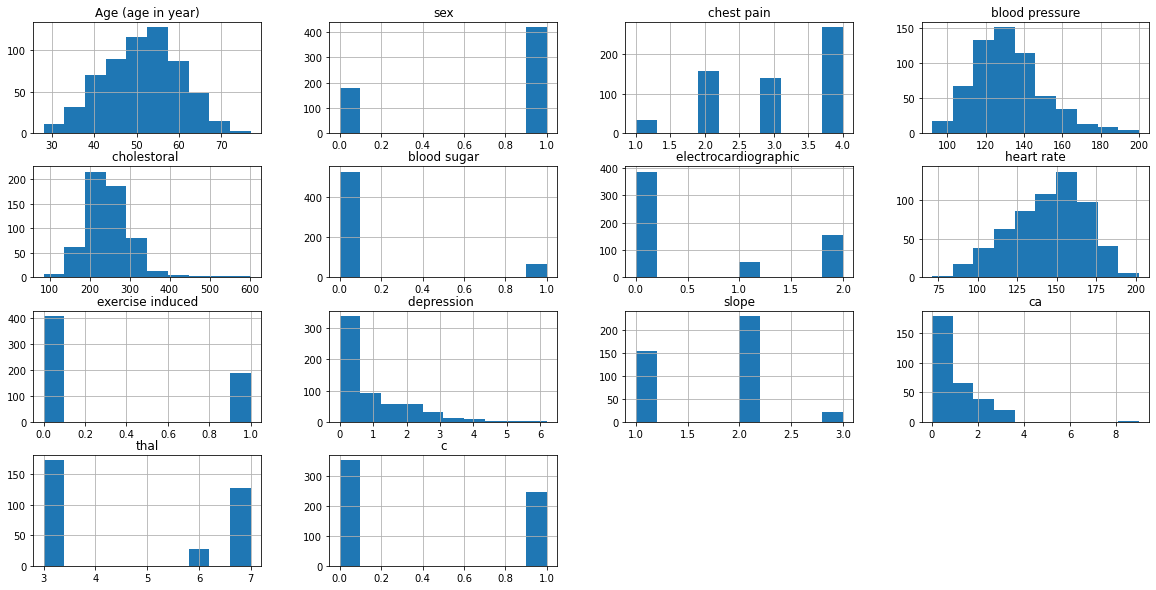

In [164]:
df.hist(figsize=(20,10),);

In [165]:
df.rename(columns= {'Age (age in year)':'Age','c':'Target','cholestoral ':'cholestoral'},inplace=True)

In [166]:
df['Target'].value_counts()

0    352
1    245
Name: Target, dtype: int64

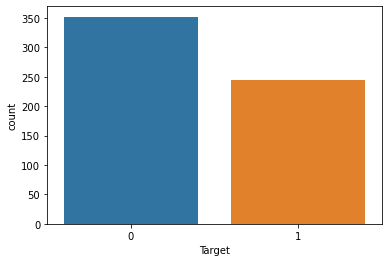

In [167]:
sns.countplot(df['Target']);

In [168]:
df['chest pain'].value_counts()

4    267
2    156
3    140
1     34
Name: chest pain, dtype: int64

In [169]:
df['sex'].value_counts()

1    419
0    178
Name: sex, dtype: int64

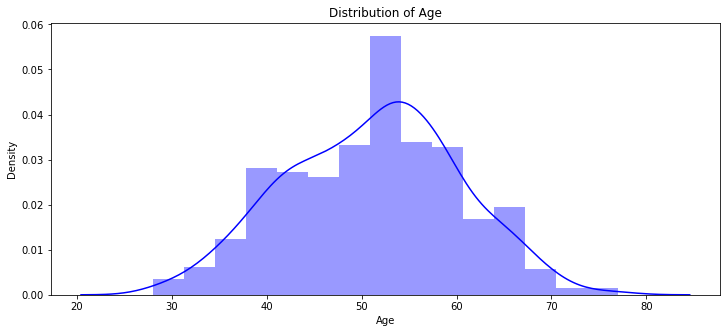

In [170]:
plt.figure(figsize=(12,5))
sns.distplot(df['Age'],color='b')
plt.title('Distribution of Age');

<AxesSubplot:xlabel='Age', ylabel='Count'>

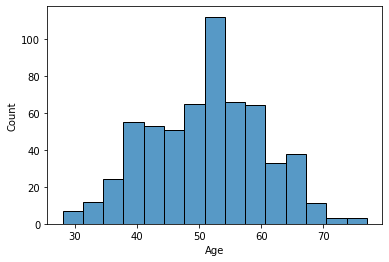

In [171]:
sns.histplot(df['Age'])

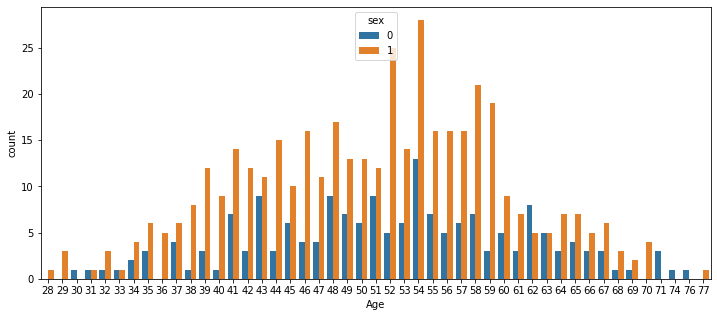

In [172]:
plt.figure(figsize=(12,5))

sns.countplot(x =df['Age'],hue=df['sex']);

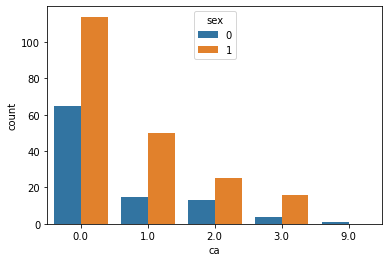

In [173]:
sns.countplot(x =df['ca'],hue=df['sex']);

In [174]:
df.head()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,Target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


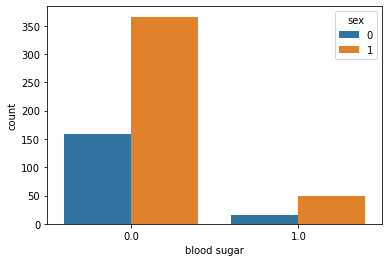

In [175]:
sns.countplot(x =df['blood sugar'],hue=df['sex']);

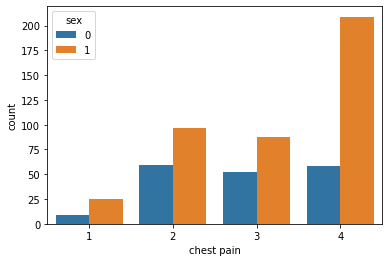

In [176]:
sns.countplot(x =df['chest pain'],hue=df['sex']);

In [177]:
df[['Age','chest pain']].groupby(df['chest pain']).agg('mean').style.background_gradient(cmap = 'copper')

,Age,chest pain
chest pain,,
1,52.676471,1.000000
2,48.089744,2.000000
3,51.500000,3.000000
4,52.632959,4.000000


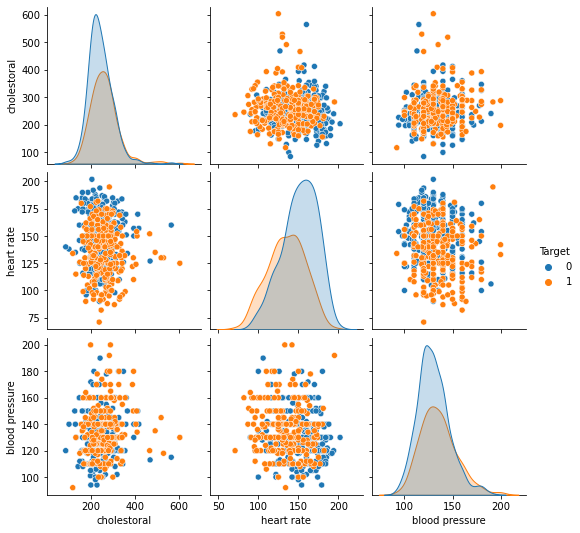

In [178]:
sns.pairplot(df,vars=["cholestoral",'heart rate','blood pressure'],kind='scatter',hue='Target')


# preprocessing

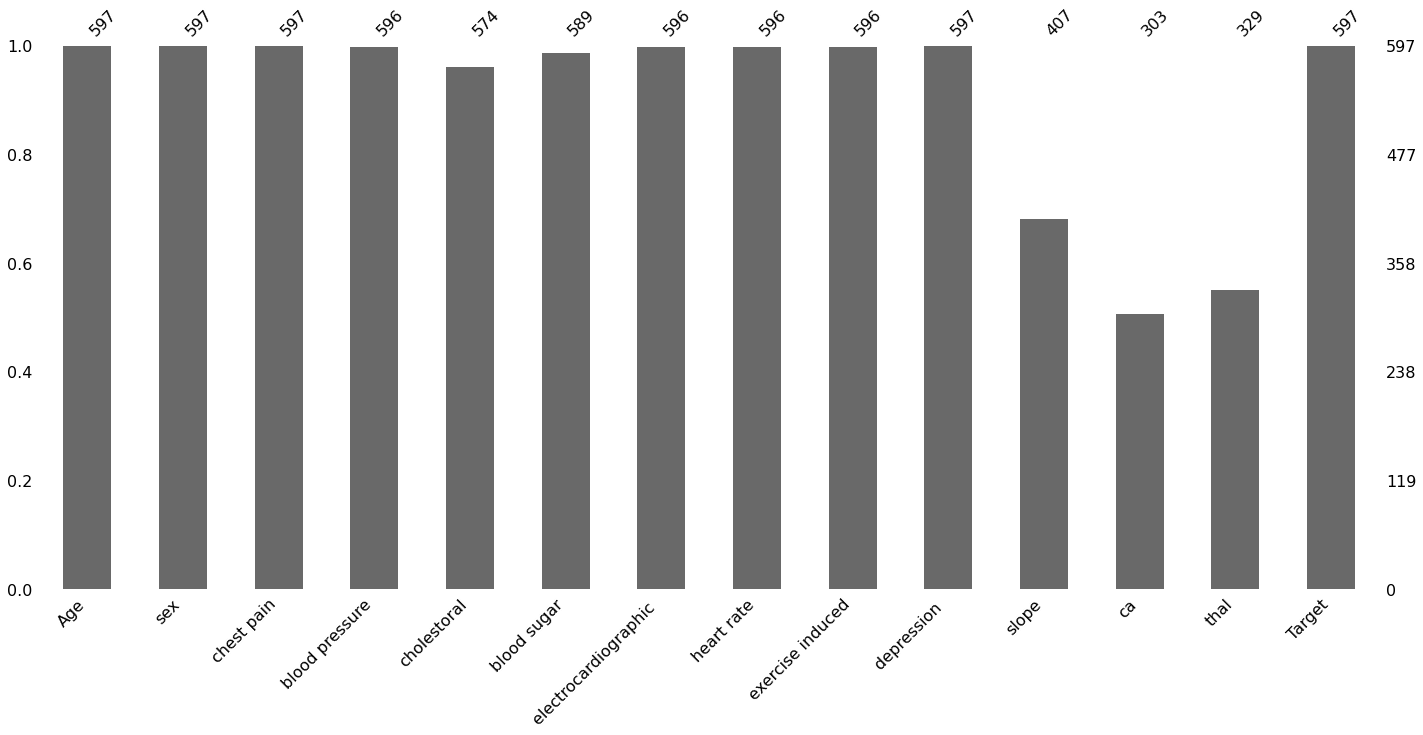

In [179]:
import missingno as msno
p=msno.bar(df)

In [180]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())* 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis =1)
missing_data

,0,1
ca,294,49.246231
thal,268,44.891122
slope,190,31.825796
cholestoral,23,3.852596
blood sugar,8,1.340034
blood pressure,1,0.167504
electrocardiographic,1,0.167504
heart rate,1,0.167504
exercise induced,1,0.167504
Age,0,0.000000


In [181]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [182]:
df.isnull().sum()

Age                      0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
Target                   0
dtype: int64

In [183]:
def outlier(cul_name):
    fig, xx = plt.subplots(nrows= 2, figsize=(13,9))
    hist_plot = sns.distplot(cul_name, ax = xx[0])
    box_plot = sns.boxplot(cul_name, ax = xx[1])

In [184]:
df.columns

Index(['Age', 'sex', 'chest pain', 'blood pressure', 'cholestoral',
       'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'Target'],
      dtype='object')

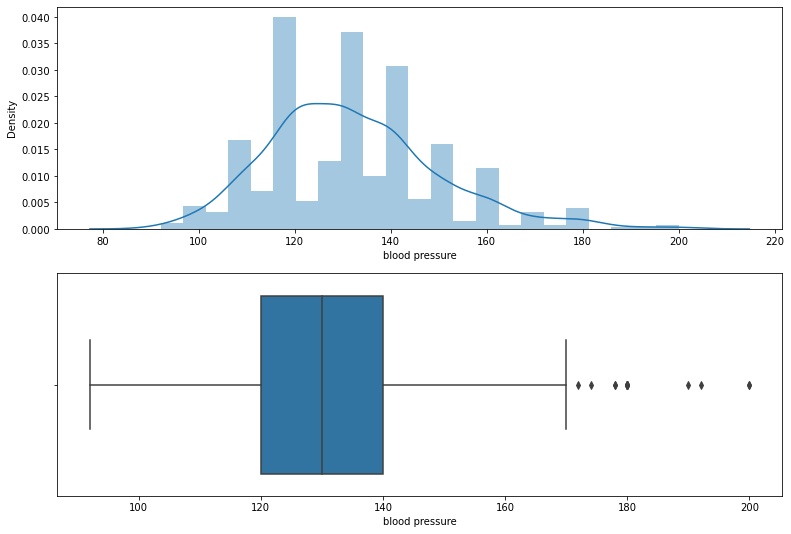

In [185]:
outlier(df['blood pressure'])

In [186]:
df['blood pressure'] = np.where(df['blood pressure']<190 , df['blood pressure'],df['blood pressure'].mean())

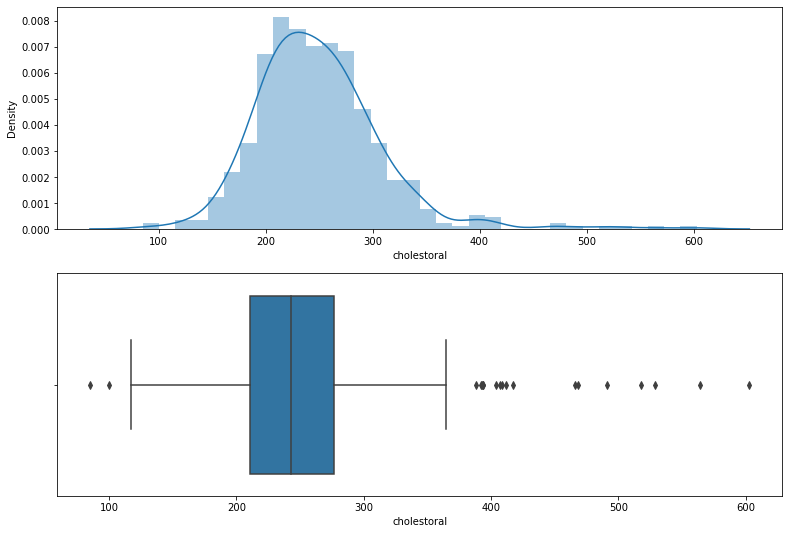

In [187]:
outlier(df['cholestoral'])

In [188]:
df['cholestoral'] = np.where(df['cholestoral']<450 , df['cholestoral'],df['cholestoral'].mean())

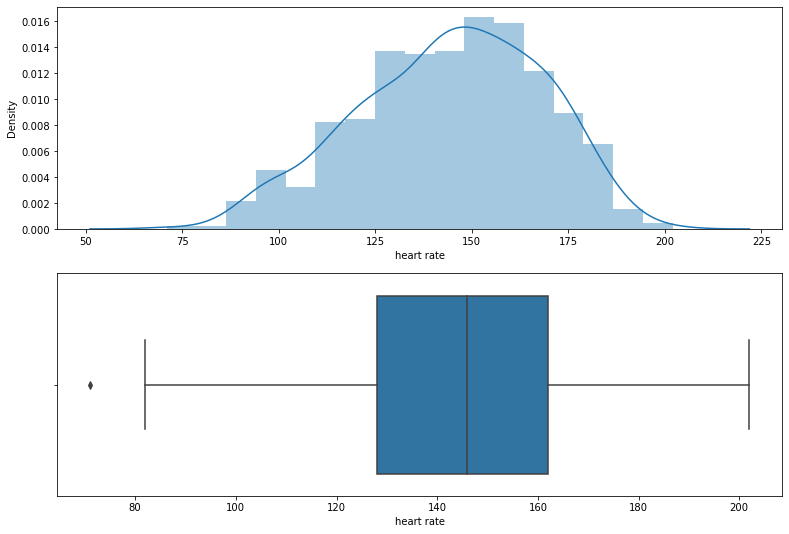

In [189]:
outlier(df['heart rate'])

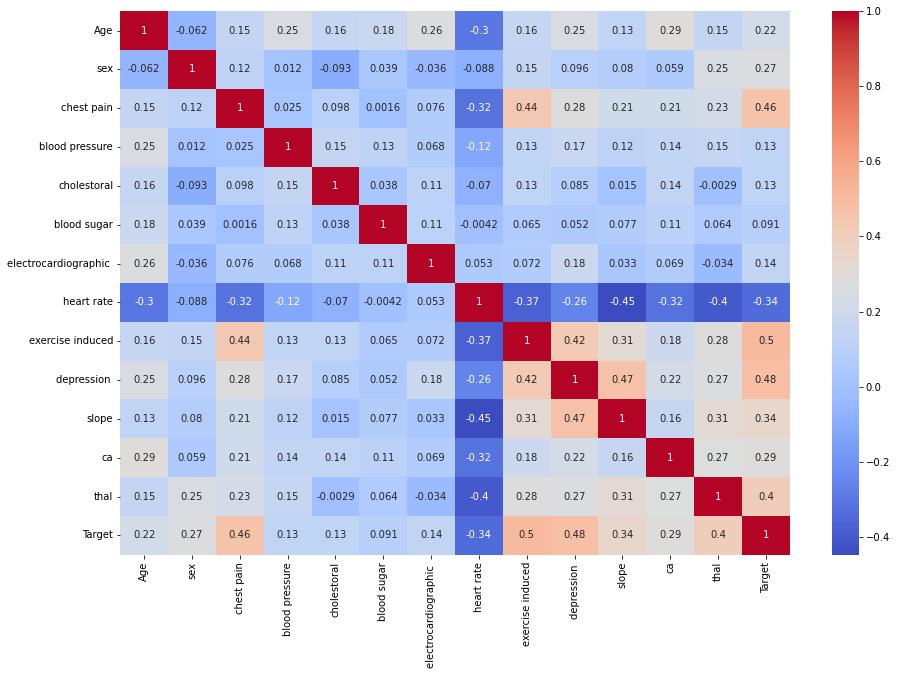

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

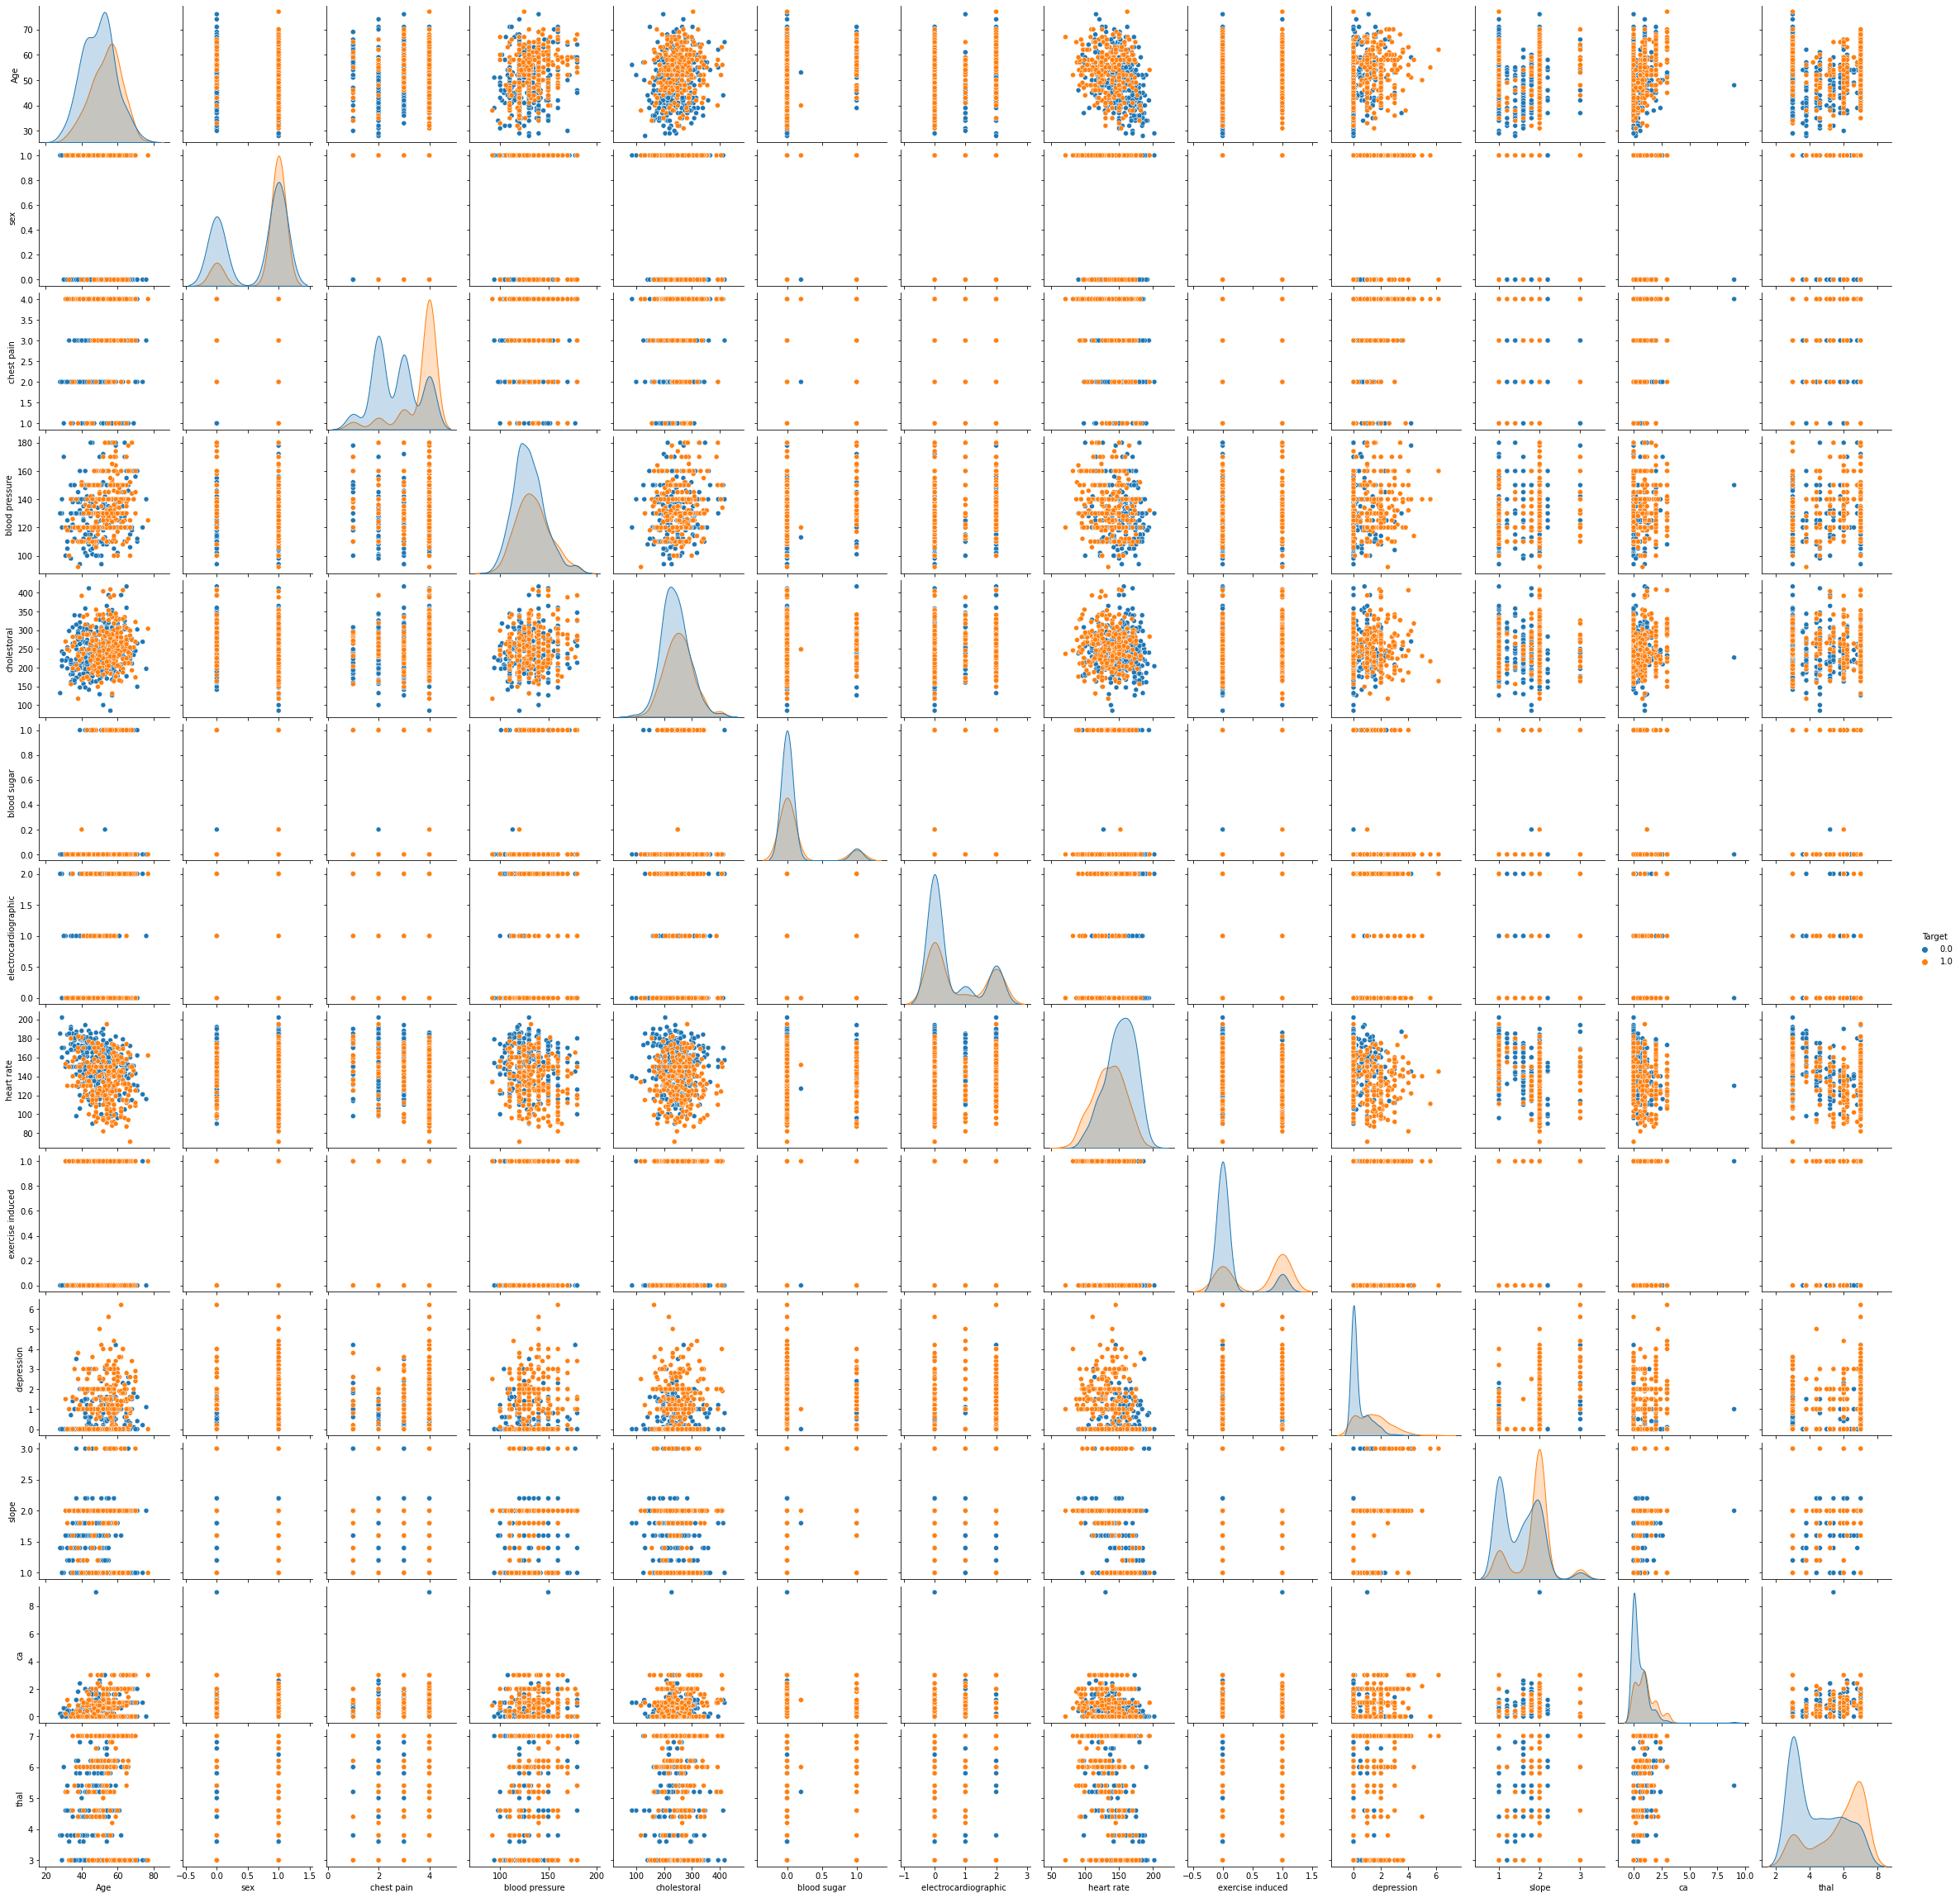

In [191]:
sns.pairplot(df,hue='Target');

In [192]:
x= df.drop('Target',axis=1)
y = df['Target']

In [193]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)
print(x_train.shape)
print(x_test.shape)

(477, 13)
(120, 13)


# Data Scalling

In [194]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

xtrain=pd.DataFrame(sc.fit_transform(x_train,y_train),columns=x_train.columns,index=x_train.index)
xtrain.head()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal
56,0.416667,1.0,1.000000,0.340909,0.418960,0.0,1.0,0.877863,0.0,0.000000,0.0,0.000000,0.00
194,0.645833,1.0,0.666667,0.431818,0.712538,0.0,0.0,0.374046,1.0,0.161290,0.5,0.222222,0.00
250,0.312500,0.0,0.333333,0.318182,0.397554,0.0,0.5,0.793893,0.0,0.000000,0.3,0.000000,0.00
458,0.770833,1.0,1.000000,0.488636,0.516820,0.0,1.0,0.427481,0.0,0.451613,0.5,0.111111,1.00
5,0.604167,1.0,1.000000,0.545455,0.327217,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75


In [195]:
xtest=pd.DataFrame(sc.transform(x_test),columns=x_test.columns,index=x_test.index)
xtest.head(10)

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal
352,0.812500,1.0,1.000000,0.318182,0.440367,0.0,1.0,0.442748,1.0,0.419355,0.5,0.222222,1.00
419,0.437500,1.0,1.000000,0.431818,0.370031,0.0,0.0,0.755725,0.0,0.000000,0.1,0.044444,0.40
361,0.458333,1.0,0.666667,0.545455,0.452599,0.0,0.0,0.702290,0.0,0.096774,0.5,0.111111,1.00
88,0.541667,0.0,0.666667,0.204545,0.394495,0.0,0.0,0.664122,0.0,0.258065,0.5,0.000000,0.00
430,0.500000,1.0,1.000000,0.431818,0.428135,0.0,0.0,0.374046,1.0,0.322581,0.5,0.088889,0.80
22,0.291667,1.0,1.000000,0.545455,0.431193,0.0,0.0,0.816794,0.0,0.000000,0.0,0.000000,0.00
59,0.604167,0.0,1.000000,0.409091,0.666667,0.0,1.0,0.671756,0.0,0.000000,0.0,0.111111,0.00
409,0.208333,1.0,1.000000,0.204545,0.339450,0.0,0.0,0.725191,0.0,0.000000,0.1,0.044444,0.20
520,0.562500,1.0,1.000000,0.545455,0.403670,0.0,0.0,0.305344,1.0,0.903226,1.0,0.000000,1.00
483,0.083333,1.0,1.000000,0.295455,0.501518,0.0,0.0,0.450382,0.0,0.000000,0.4,0.133333,0.55


# Create Model

Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

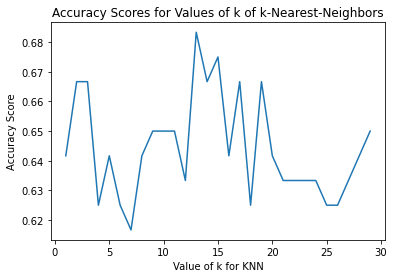

In [196]:
# k_ploting

k_range = list(range(1,30))
score= []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))
    
    
plt.plot(k_range, score)

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')

plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')    

In [197]:
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred_grade = gbk.predict(x_test)


In [198]:
gradient_acc = accuracy_score(y_test, y_pred_grade)
print("Training accuracy: ",gradient_acc)



Training accuracy:  0.8583333333333333


In [199]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [200]:
rf_ac = accuracy_score(y_test, y_pred_rf)
print("Random_forest accuracy: ", rf_ac)


Random_forest accuracy:  0.8666666666666667


<AxesSubplot:title={'center':'Gradient_Boosting'}>

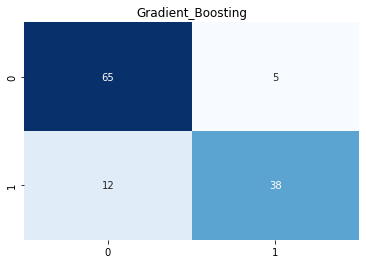

In [201]:
gbk_pred=confusion_matrix(y_test,y_pred_grade)
plt.title("Gradient_Boosting")
sns.heatmap(gbk_pred,annot=True,cmap="Blues",fmt="d",cbar=False)

<AxesSubplot:title={'center':'Random_forest'}>

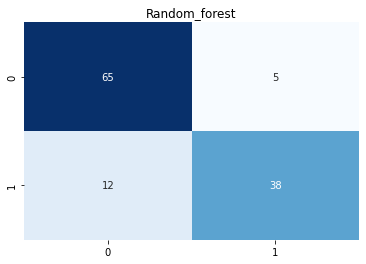

In [202]:
rmf=confusion_matrix(y_test,y_pred_grade)
plt.title("Random_forest")
sns.heatmap(rmf,annot=True,cmap="Blues",fmt="d",cbar=False)

In [203]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        70
         1.0       0.89      0.78      0.83        50

    accuracy                           0.87       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.87      0.87       120



In [204]:
print(classification_report(y_test, y_pred_grade))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        70
         1.0       0.88      0.76      0.82        50

    accuracy                           0.86       120
   macro avg       0.86      0.84      0.85       120
weighted avg       0.86      0.86      0.86       120



In [205]:
models = pd.DataFrame({'Model': ['Random_forest','GradientBoosting'],'Train & test accuracy': [gradient_acc,rf_ac]})

models.sort_values(by = 'Train & test accuracy', ascending = False).reset_index(drop=True)

,Model,Train & test accuracy
0,GradientBoosting,0.866667
1,Random_forest,0.858333
